# Predicting Bike Rentals

Many U.S. cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

[Hadi Fanaee-T](http://www.fanaee.com/) compiled this data into a CSV file, which you'll work with in this project. The file contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day. You can download the data from the [University of California, Irvine's website](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). 

Description of columns:

    instant - A unique sequential ID number for each row
    dteday - The date of the rentals
    season - The season in which the rentals occurred
    yr - The year the rentals occurred
    mnth - The month the rentals occurred
    hr - The hour the rentals occurred
    holiday - Whether or not the day was a holiday
    weekday - The day of the week (as a number, 0 to 7)
    workingday - Whether or not the day was a working day
    weathersit - The weather (as a categorical variable)
    temp - The temperature, on a 0-1 scale
    atemp - The adjusted temperature
    hum - The humidity, on a 0-1 scale
    windspeed - The wind speed, on a 0-1 scale
    casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
    registered - The number of registered riders (people who had already signed up)
    cnt - The total number of bike rentals (casual + registered)


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

bike_rentals = pd.read_csv('bike_rental_hour.csv')

In [3]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


We will now take a closer look at the density distribution of the total number of bike rentals using a histogram. 

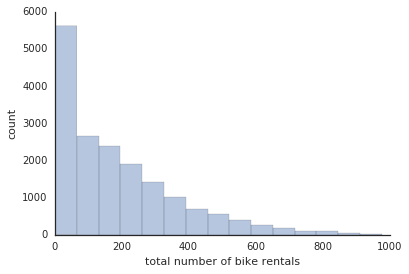

In [5]:
sns.set_style('white')
%matplotlib inline

ax = sns.distplot(bike_rentals.cnt, kde = False, bins = 15)
sns.despine()
ax.set(xlabel='total number of bike rentals', ylabel='count')
plt.xlim(0,1000)
plt.show()

Now we will examine the correlations between the different columns of our dataframe. First we present the correlation matrix via a seaborn heatmap and below are the actual correlations. 

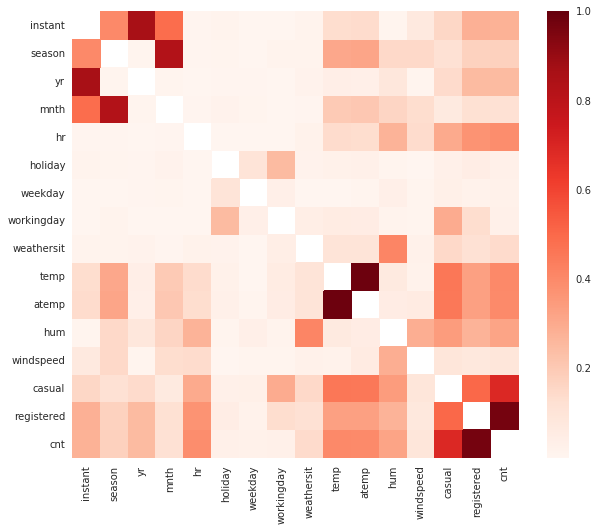

In [6]:
corr = bike_rentals.corr()

# Explore correlations between cnt and all the other columns 
corr = bike_rentals.corr()

# Plot a heatmap to better show correlations 
fig = plt.figure(figsize = (10,8))
mask = corr == 1
heatmap = sns.heatmap(abs(corr), mask = mask, cmap = 'Reds')

In [7]:
print(corr)

             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.0087

In [8]:
# assign labels to segments of time in a day
def assign_label(hour):
    if 6 <= hour and hour < 12:
        return 1
    elif 12 <= hour and hour < 18:
        return 2
    elif 18 <= hour and hour < 24:
        return 3
    elif 0 <= hour and hour < 6:
        return 4

In [9]:
#create new column usign assign_label function
bike_rentals['time_label'] = bike_rentals.hr.apply(assign_label)

## Error metric

The mean squared error metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.



## Selecting train and test datasets


In [10]:
# the plebeian way
train = bike_rentals.sample(frac=.8) #train dataset with 80% of rows
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]


In [11]:
train.shape, test.shape

((13903, 18), (3476, 18))

In [12]:
# the patrician way
from sklearn.model_selection import train_test_split

#split dataset 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(bike_rentals.drop('cnt', axis=1),
                                                   bike_rentals.cnt, train_size = 0.8,
                                                   random_state = 1)

#split train dataset 75% train and 25% cross-validation
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                   y_train, train_size = 0.75,
                                                   random_state = 1)
x_train.shape, x_test.shape, x_val.shape


((10427, 17), (3476, 17), (3476, 17))

In [13]:
# features
features = ['season', 'yr', 'mnth', 'hr', 'weathersit', 'temp', 'atemp', 
            'hum', 'windspeed', 'time_label']

## Linear regression

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

l = LinearRegression()
l.fit(x_train[features], y_train)
linear_predictions_train = l.predict(x_train[features])
linear_predictions_val = l.predict(x_val[features])
mse_linear_train = mean_squared_error(y_train, linear_predictions_train)
mse_linear_val = mean_squared_error(y_val, linear_predictions_val)

print('''The training mse of the linear regression model is: {}, 
      The cross validation linear regression mse is: {}.'''.format(mse_linear_train, mse_linear_val))

The training mse of the model is: 17674.747357254582, 
      The cross validation mse is: 17046.647829904014.


The MSE of for the linear regression of both the traininig and cross-validation models are rather high. We will need to use different methods to try and reduce it.  

## Decision tree regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor
list_mse_tree_train = []
list_mse_tree_val = []

for leaf in range(1,25):
    d = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=1)
    d.fit(x_train[features], y_train)
    tree_predictions_train = d.predict(x_train[features])
    tree_predictions_val = d.predict(x_val[features])
    mse_tree_train = mean_squared_error(y_train, tree_predictions_train)
    mse_tree_val = mean_squared_error(y_val, tree_predictions_val)
    
    list_mse_tree_train.append(mse_tree_train)
    list_mse_tree_val.append(mse_tree_val)
    
    print('''With a minimum leaf number of {}, the decision tree regressor training mse of the model is: {}, 
          The cross validation decision tree regressor mse is: {}.'''.format(leaf,mse_tree_train, mse_tree_val))

With a minimum leaf number of 1, the decision tree regressor training mse of the model is: 50.40483040823503, 
          The cross validation decision tree regressor mse is: 13102.32214550569.
With a minimum leaf number of 2, the decision tree regressor training mse of the model is: 1528.1480531312939, 
          The cross validation decision tree regressor mse is: 11935.098117248433.
With a minimum leaf number of 3, the decision tree regressor training mse of the model is: 2672.693851584942, 
          The cross validation decision tree regressor mse is: 10685.341929944303.
With a minimum leaf number of 4, the decision tree regressor training mse of the model is: 3493.2412159138134, 
          The cross validation decision tree regressor mse is: 10230.315865030276.
With a minimum leaf number of 5, the decision tree regressor training mse of the model is: 4104.4785979408, 
          The cross validation decision tree regressor mse is: 9834.878776689486.
With a minimum leaf number of 6,

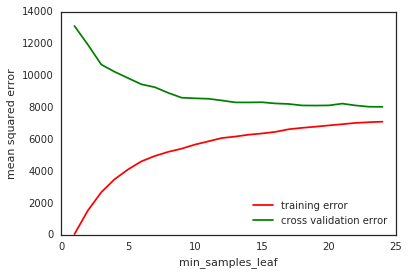

In [24]:
plt.plot(range(1, 25), list_mse_tree_train, color = 'red', label = 'training error')
plt.plot(range(1, 25), list_mse_tree_val, color = 'green', label = 'cross validation error')
plt.xlabel('min_samples_leaf')
plt.ylabel('mean squared error')
plt.legend(loc = 'lower right')

The train decision tree regressor performs better than the cross validation in all cases. It is interesting to note that the cross-validation performs better as the minimum leaf number increases, while the train performs worse. 

## Random forest regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor 

list_mse_forest_train = []
list_mse_forest_val = []

for leaf in range(1,25):
    f = RandomForestRegressor(min_samples_leaf=leaf, random_state=1)
    f.fit(x_train[features], y_train)
    forest_predictions_train = f.predict(x_train[features])
    forest_predictions_val = f.predict(x_val[features])
    mse_forest_train = mean_squared_error(y_train, forest_predictions_train)
    mse_forest_val = mean_squared_error(y_val, forest_predictions_val)
    
    list_mse_forest_train.append(mse_forest_train)
    list_mse_forest_val.append(mse_forest_val)
    
    print('''With a minimum leaf number of {}, the decision tree regressor training mse of the model is: {}, 
          The cross validation decision tree regressor mse is: {}.'''.format(leaf,mse_forest_train, mse_forest_val))

With a minimum leaf number of 1, the decision tree regressor training mse of the model is: 1469.4076134262812, 
          The cross validation decision tree regressor mse is: 7955.94718762886.
With a minimum leaf number of 2, the decision tree regressor training mse of the model is: 2375.8918745635633, 
          The cross validation decision tree regressor mse is: 7810.9707572083535.
With a minimum leaf number of 3, the decision tree regressor training mse of the model is: 3253.3104805240714, 
          The cross validation decision tree regressor mse is: 7774.224352812954.
With a minimum leaf number of 4, the decision tree regressor training mse of the model is: 3854.3721251466673, 
          The cross validation decision tree regressor mse is: 7657.758733120381.
With a minimum leaf number of 5, the decision tree regressor training mse of the model is: 4357.287852454342, 
          The cross validation decision tree regressor mse is: 7529.87469871217.
With a minimum leaf number of 6,

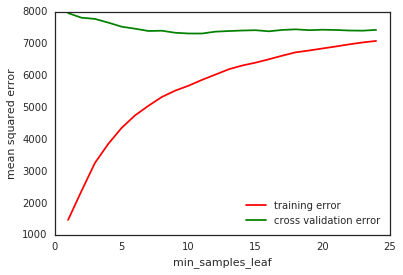

In [27]:
plt.plot(range(1, 25), list_mse_forest_train, color = 'red', label = 'training error')
plt.plot(range(1, 25), list_mse_forest_val, color = 'green', label = 'cross validation error')
plt.xlabel('min_samples_leaf')
plt.ylabel('mean squared error')
plt.legend(loc = 'lower right')